- - - -
# Curve Fitting Tutorial

- - - -

Martin Veillette @ Berea College

- - - -


In [2]:
# import modules
import numpy as np
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

Writing Functions (reminder)

In [3]:
# standard approach

def myFunctionA(x,t):
  return np.sin(x+2*t)

myFunctionA(3,5)

0.4201670368266409

In [4]:
#lambda expression

myFunctionB = lambda x, t : np.sin(x+2 *t) 

myFunctionB(3,5)

0.4201670368266409

## non-linear least squares using fmin optimization

Consider some data points (X,Y)

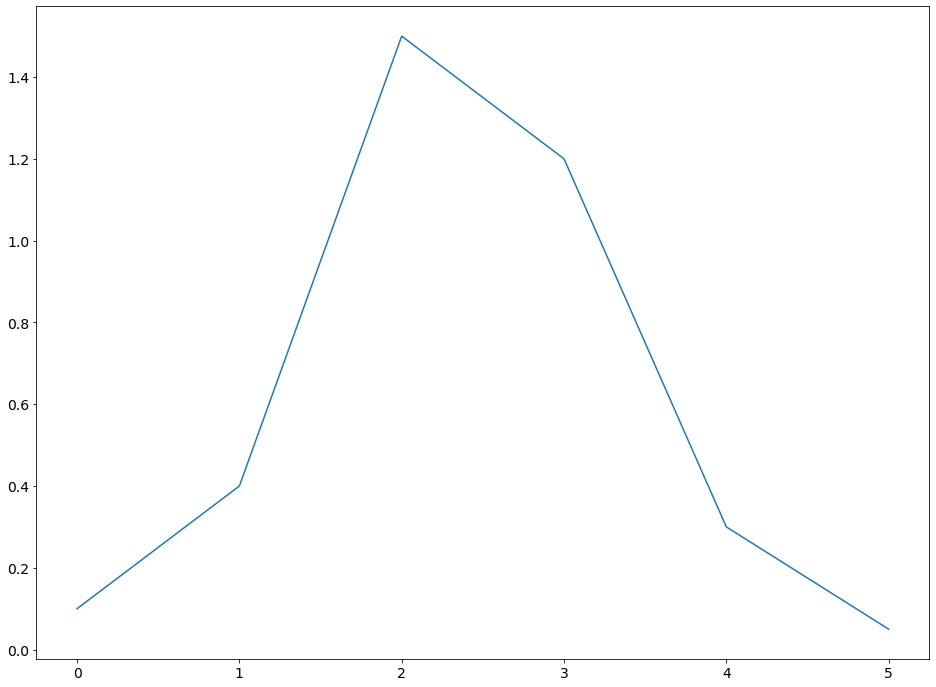

In [17]:
X = array([0 ,   1 , 2 ,   3 ,   4 ,   5 ])
Y = array([0.1,  0.4 , 1.5 , 1.2 , 0.3 , 0.05 ])
plt.plot(X,Y)

The graph is similar to a gaussian curve. 
Let's attempt to fit a gaussian function to the data
$$Y= Y_{max} \exp{\left[-\left( \frac{X-X_0}{\sigma}\right)^2 \right]} $$

For the purpose of the calculation, let's define the above function as "predictedFunction" where the three free parameters $\left\{ Y_{max}, X_0, \sigma \right\} $ are represented as an array called '$u$' (for unknowns) made of the variables $\left\{ u[0], u[1], u[2] \right\} $ 

In [37]:
# The predictedFunction is a function of the array 'u' 
predictedFunction = lambda u: u[0]*exp(-((X-u[1])/u[2])**2)

The best fit, in the least square sense, attempts to minimize the sum of the squared of the residuals. 

The residuals are defined as the difference between the predicted function and the measured value, i.e. $ y_i - \textrm{testfunction}(x_i) $




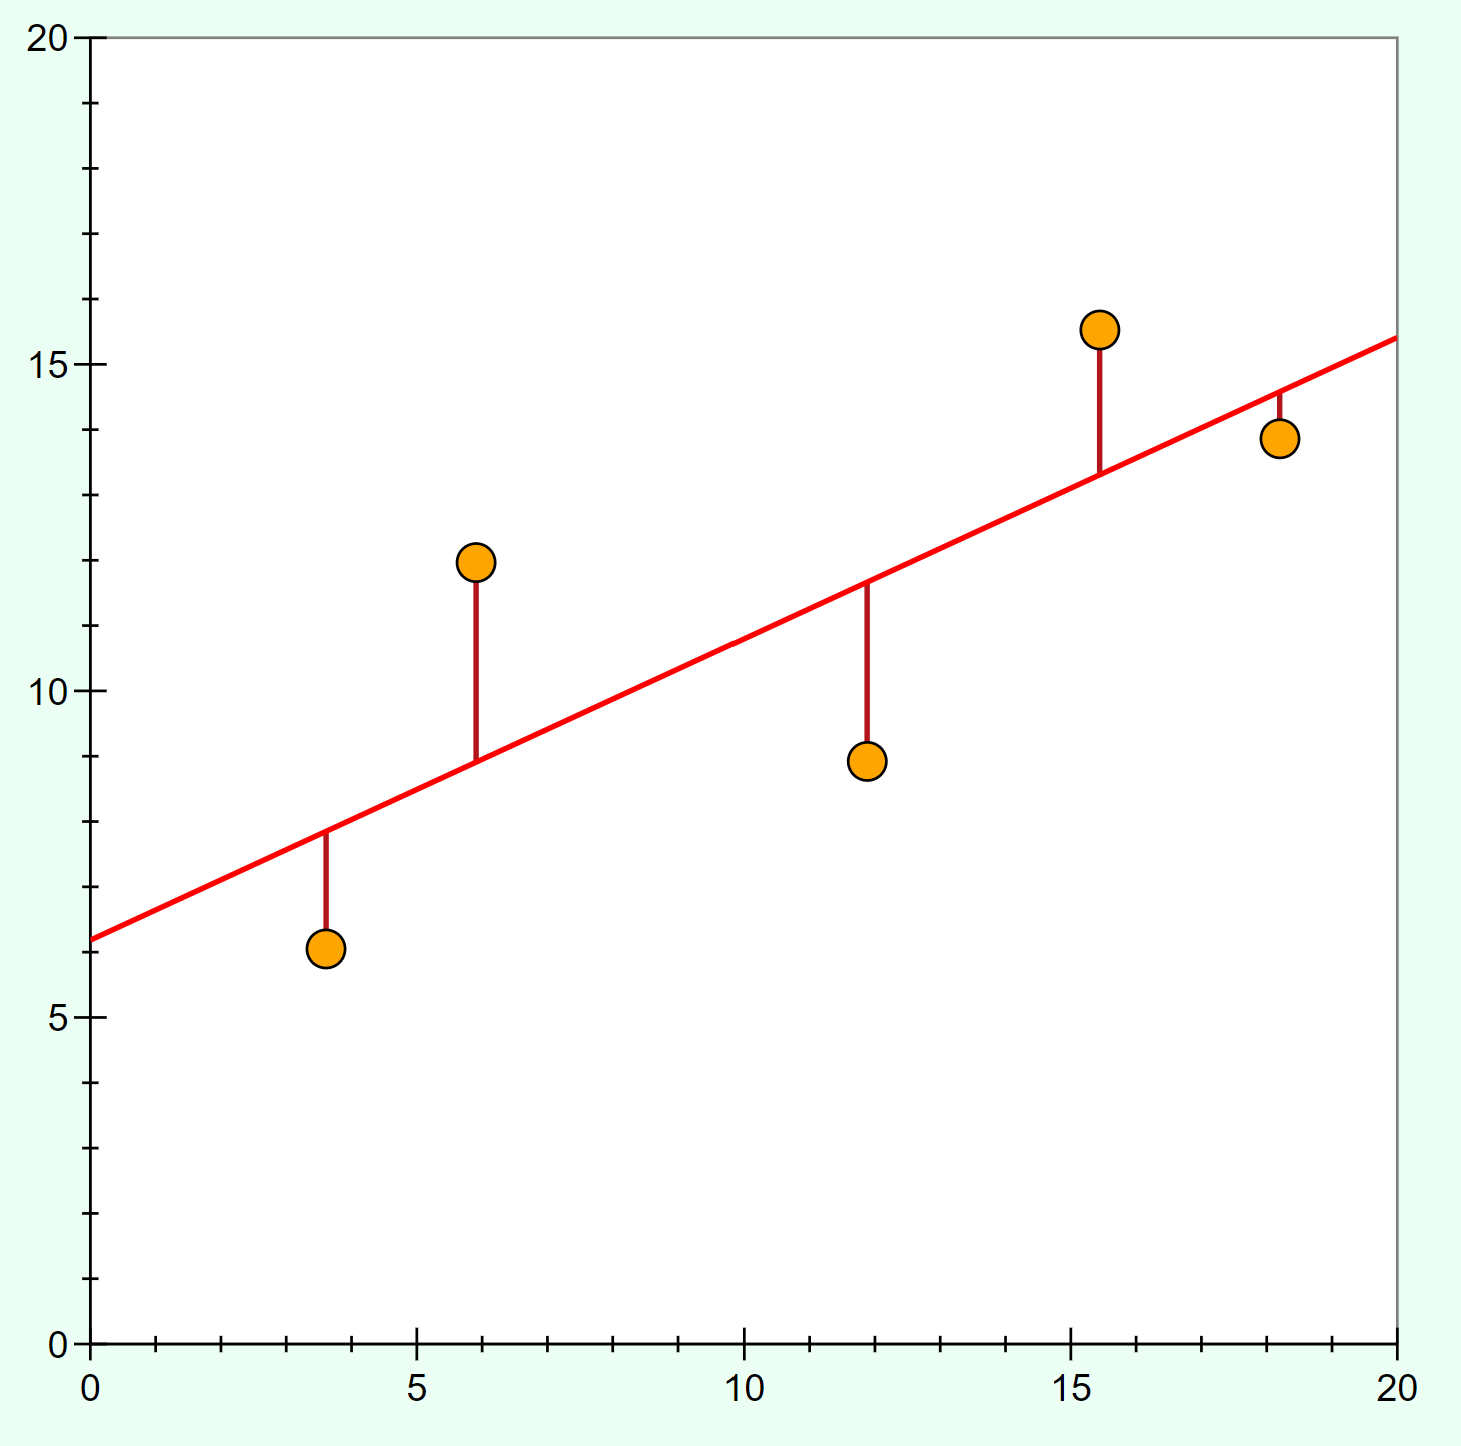


We want to set the values of 'u' such that $\chi$ is as small as possible.The goal of the least square regression is to find the parameters of 'u' such that it minimizes the square of the deviation, i.e.
$$ \chi = \sum_{x_i} \left( y_i - \textrm{predictedFunction}(x_i) \right)^2 $$
We want to minimize χ. 



In [22]:
## define a function that is the square of the residuals squared
χ = lambda u: sum( (Y-predictedFunction(u))**2 )

At this point, we can ask scipy to minimize the function χ, in other words, find the best fitting parameters u[0],u[1] and u[2] that makes χ as small as possible ( χ is a positive definite function since it is by definition the square of the residuals)

In scipy, the function 'fmin' is a routine that 'attempts' to minimize a function starting with a hint from the user. The closer the hint the better it is at finding the minimum. It returns the value of the function at its minimum and the numbner of iterations it took to find it.


In [38]:
## the minimization function takes two arguments
## * (1) func= the function to be minimized
## * (2) x0 = an array with some initial guesses for the best fit parameters 
uGuess=[1.5,2,0.5]  # the amplitude is about 1.5, the mean of X is about 2 and the halfwidth is about 0.5
minimizationResults = fmin(func=χ, x0=uGuess)

Optimization terminated successfully.
         Current function value: 0.010997
         Iterations: 85
         Function evaluations: 156


Althought, it is interesting to know the value of χ, we are ultimately more interested in the best fit parameters

In [27]:
print('values of the fitting parameters')
print(minimizationResults)

values of the fitting parameters
[1.61716242 2.3704599  1.20387765]


Let's plot the data points

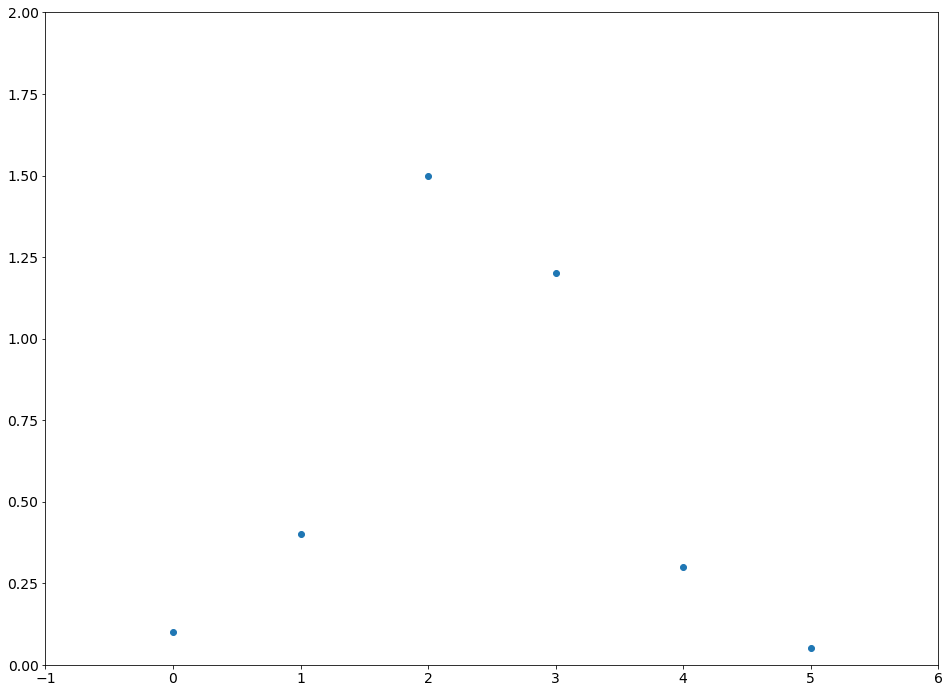

In [39]:
# Plot the data points as O's 
plt.plot(X, Y,'o')
plt.xlim([-1,6])
plt.ylim([0,2])
plt.show()

Let's plot the best fit function on a graph



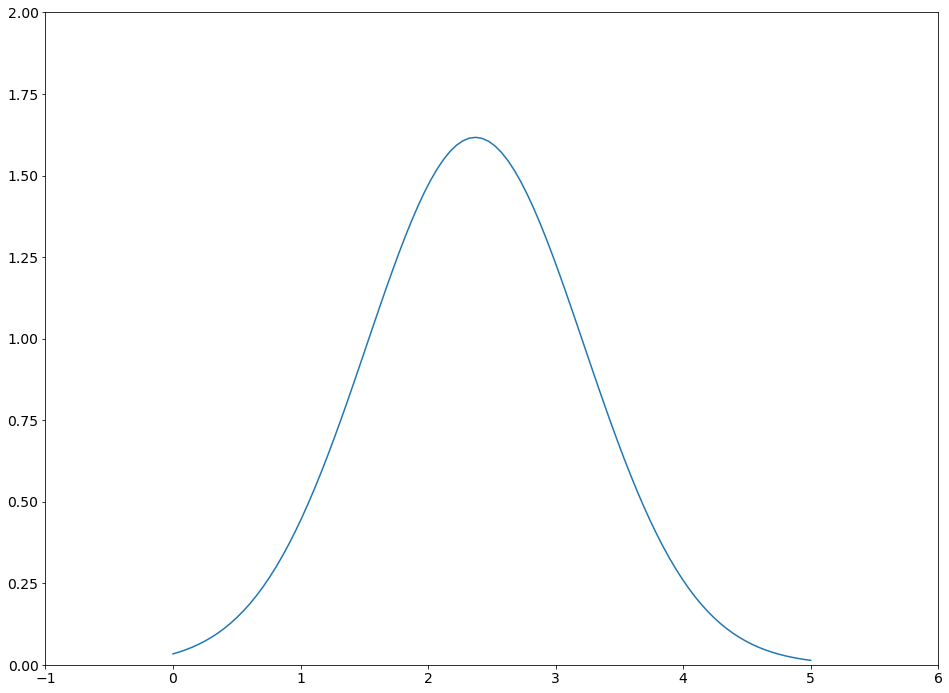

In [36]:
a=minimizationResults

xRange = np.linspace(0,5,100)
bestFit = lambda a: (a[0]*exp(-((xRange-a[1])/a[2])**2))
plt.plot(xRange, bestFit(a))

plt.xlim([-1,6])
plt.ylim([0,2])
plt.show()

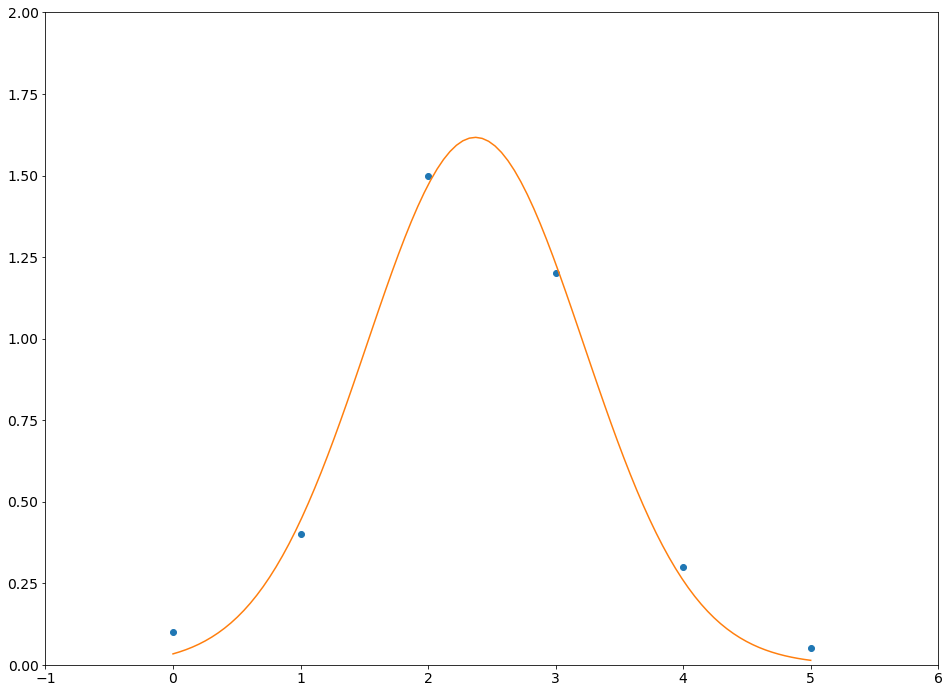

In [41]:

# Plot the data points as O's 
plt.plot(X, Y,'o')

# Plot the best fit line
a=minimizationResults
xRange = np.linspace(0,5,100) # range of X to plot (0,5) with a 100 "steps"
bestFit = lambda a: (a[0]*exp(-((xRange-a[1])/a[2])**2))
plt.plot(xRange, bestFit(a))

# plot range for x and y axes
plt.xlim([-1,6])
plt.ylim([0,2])

# plot the results
plt.show()

## Curve Fitting for Polarization


In [ ]:
import pandas

# the data in the folder content may get erased by colab
df = pandas.read_excel('PolarizationFakeData.xlsx', sheet_name='Sheet1')


In [ ]:
df.iloc[:,:]

,Angle,Intensity
0,1,0.999726
1,5,0.993163
2,9,0.977975
3,13,0.954457
4,17,0.923067
...,...,...
84,337,0.862596
85,341,0.904605
86,345,0.939711
87,349,0.967233


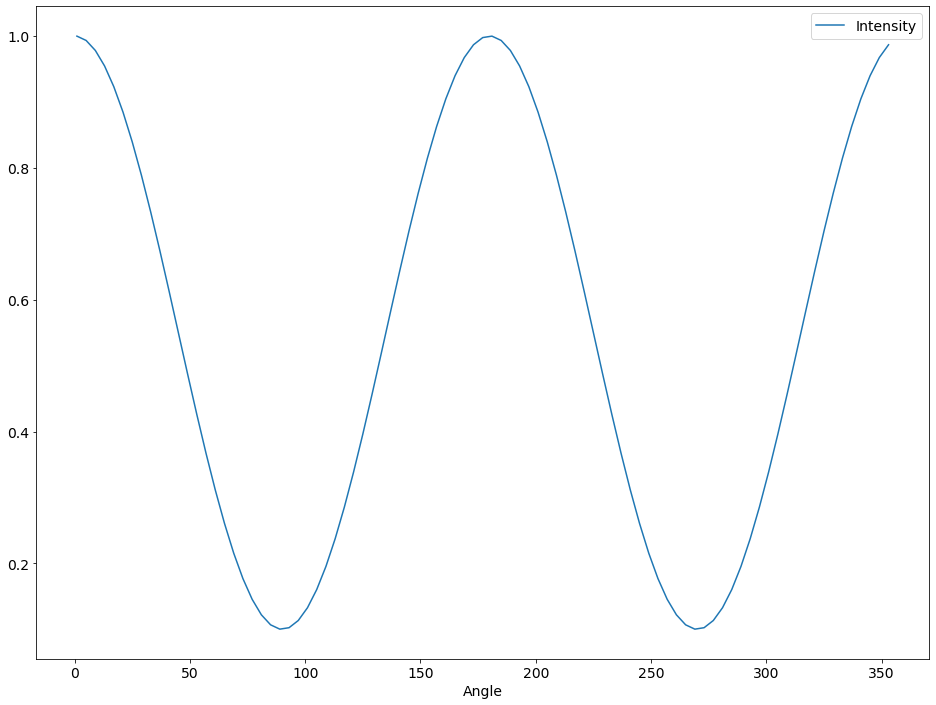

In [ ]:
df.plot(x='Angle',y='Intensity');

In [ ]:
unpackedArray = df.values



In [ ]:
# fmin optization

X = unpackedArray[:,0]
Y = unpackedArray[:,1]

# a[0] is the x asymptote and a[1] is the y asymptote and 
fn = lambda a: a[0]*np.abs((cos((X-a[1])*(np.pi/180))))**a[2] + a[3]
Sn = lambda x: sum( (fn(x)-Y)**2 )

A = fmin(func=Sn, x0=[1,0,2,0.1])
print(A)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 87
         Function evaluations: 153
[8.99996794e-01 9.16328549e-04 1.99997894e+00 1.00001668e-01]


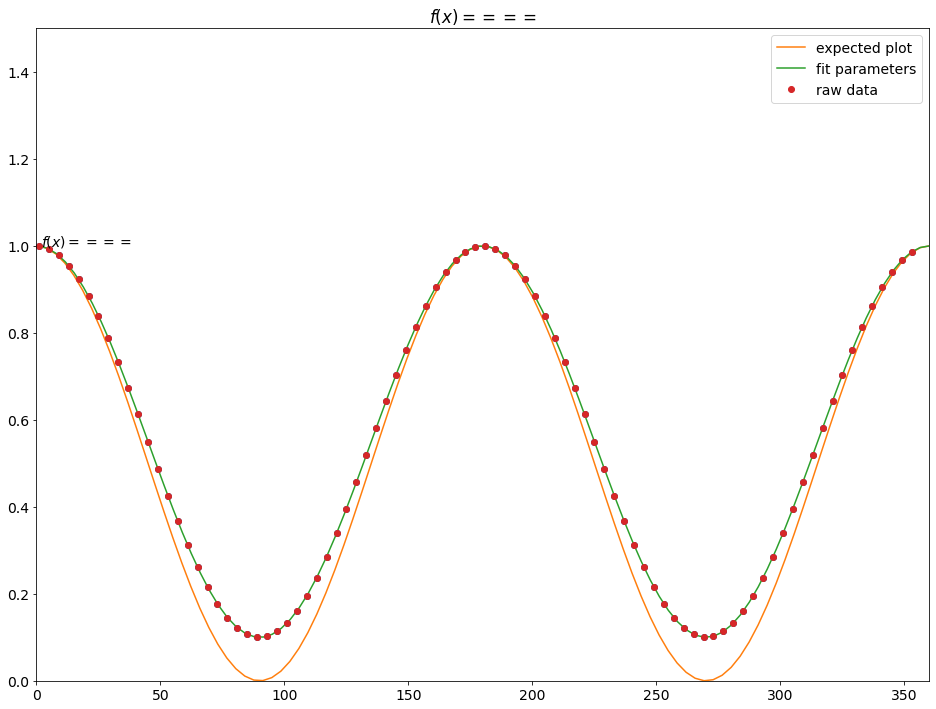

In [ ]:
plt.plot(X, Y,'o')
xplot = linspace(0.75, 360,100)
fnfit = lambda x,a: a[0]*np.abs((cos((x-a[1])*np.pi/180)))**a[2] + a[3]

eps = 1e-16
xp = 0.5
yp = 1.5
x = linspace(xp,360,100)
y = cos(x*np.pi/180)**2
plt.plot(x,y,label='expected plot')
plt.ylim([0,yp])
plt.title('plot of how the function should look with actual parameters')

plt.plot(xplot, fnfit(xplot, A),label='fit parameters')
plt.plot(X,Y, 'o',label='raw data')
plt.title(r'$f(x)====$')
plt.text(2,1,r'$f(x)====$')
plt.xlim([0,360])
plt.legend()
plt.show()